In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Underfitting, Overfitting y métricas de evaluación

Teniendo en cuenta la práctica 1 y 2 de esta clase, usar los siguientes datos de conversiones

In [17]:
data = pd.read_csv("../Datasets/conversiones.csv")

In [18]:
data.head()

,Costo1,Costo2,Topico,Quincena,TipoProducto,Conversion
0,0.341,0.299,2,7,1,Si
1,0.151,0.079,2,8,1,Si
2,0.384,0.324,4,9,1,Si
3,0.200,0.192,4,9,1,Si
4,0.415,0.020,2,8,1,Si


## Pasar variable categórica a variable numérica

Con el método categorical pasamos la variable categórica a 1 y 0, para poder clasificar y predecir

In [19]:
data["Conversion"] = pd.Categorical(data["Conversion"]).codes

In [20]:
data.head()

,Costo1,Costo2,Topico,Quincena,TipoProducto,Conversion
0,0.341,0.299,2,7,1,1
1,0.151,0.079,2,8,1,1
2,0.384,0.324,4,9,1,1
3,0.200,0.192,4,9,1,1
4,0.415,0.020,2,8,1,1


Analizamos ciertas correlaciones vemos que la costo 1 y costo 2 tiene una correlación significativa con respecto a las demás variables.

<Axes: >

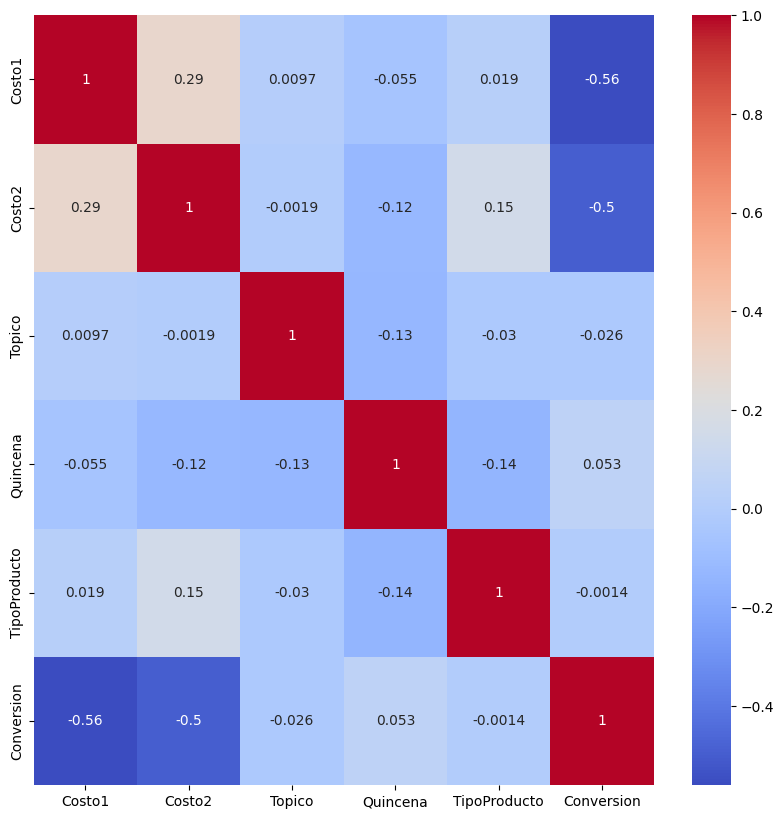

In [22]:

corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')


Es hora de generar nuestro algoritmo en este caso usaremos K vecinos más cercanos con K=1

In [23]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)

Para este caso usaremos **Conversion** como la variable de salida, y como variable de entrada los demás datos:

In [24]:
y = data["Conversion"]
x = data.drop(["Conversion"], axis = 1)

In [25]:
clf.fit(x.values, y.values)

KNeighborsClassifier(n_neighbors=1)

Necesitamos sacar una predicción de la variable salida con esto compraramos con los datos de salida **y**, y analizar que tan bueno es:

In [26]:
y_pred = clf.predict(x.values)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_pred,y)

0.9998749789026898

## Como observamos anteriormente el modelo es bastante bueno, casi de 1.0...
# **¡¡¡Pero espera!!!, si tuviera otros datos nuevos con los cuales el modelo nunca ha interactuado y deseo saber si este modelo se comporta adecuadamente con estos nuevos datos, ¿cómo lo voy a saber?**

# Ejercicio:

-Con la problemática anterior, construya una metodología la cual analice si realmente dicho modelo también sirve con datosque no fueron usados para ajustar el algoritmo.

Tips: Recuerda el análisis de overfitting y underfitting visto en clase.

Ahora, ya tenemos más herramientas de evaluación para analizar la effectividad del modelo.

-Use las métricas de evaluación vistas en la clase de hoy y anteriores, para sacar más conclusiones sobre la efectividad del modelo.

con lo anterior, responda:

- ¿Resulta mejor usar un método aleatorio para solucionar este problema (que tecnicamente seria decirle al oráculo de la mitología griega cuándo nacerá la gallina del huevo)?, ¿Qué métrica puede solucionar esta pregunta?

- ¿ Este modelo es sensible a falsos negativos?, numéricamente hablando es: ¿significativo, o despeciable dicha sensibilidad?
    ¿Qué métrica me ayuda a resolver este problema?
    
- Si el director principal de la casa de moneda de argentina, ve el primer score de mi modelo que es de 0.999, luego me dice que pase dicho modelo a la base de datos general para obtener predicciones ya que dicho modelo es perfecto. ¿Cómo le explicarías que dicho modelo posiblemente puede tener problemas con nuevos datos y por qué? 
